In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
plb.rcParams['font.size'] = 12
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [12]:
#Hoop indicates support from hoop stress and zero axial stress
#Tension indicates support from internal tension and zero hoop stress

def lsHoop(rs,nu):
    return np.sqrt(-nu * rs**2 + (1 + nu))

def volHoop(rs,nu):
    return rs**2 * lsHoop(rs,nu)

def conductanceHoop(rs,nu):
    return rs**4 / lsHoop(rs,nu)

def rsTension(ls,nu):
    return np.sqrt(-nu * ls**2 + (1+nu))

def volTension(ls,nu):
    return rsTension(ls,nu)**2 * ls

def conductanceTension(ls,nu):
    return rsTension(ls,nu)**4 / ls

In [13]:
#Data output from Uniform contraction radial final.mph
#Columns (all quantities normalized): 0: nu, 1: t (won't be used), 2: urInner, 3: uzOutlet, 4: Volume, 5: conductance
uniform_radial_data0 = (np.loadtxt("Uniform contraction radial final data.txt"))

#unpack, separating by different nu values and trim data for plotting. 
num_nu = 5 #total number of nu parameters solved in COMSOL

len_data = len(uniform_radial_data0)
numPoints = 20 #Number of points that will be displayed for each value of nu. 
uniform_radial_data = [0]*num_nu
for i in range(num_nu):
    data_temp = uniform_radial_data0[i*int(len_data/num_nu):(i+1)*int(len_data/num_nu)]
    data_temp_trimmed = data_temp[0::int((len_data/num_nu)/numPoints)]
    uniform_radial_data[i] = data_temp_trimmed
uniform_radial_data = np.array(uniform_radial_data)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_73875/517179374.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-nu * rs**2 + (1 + nu))


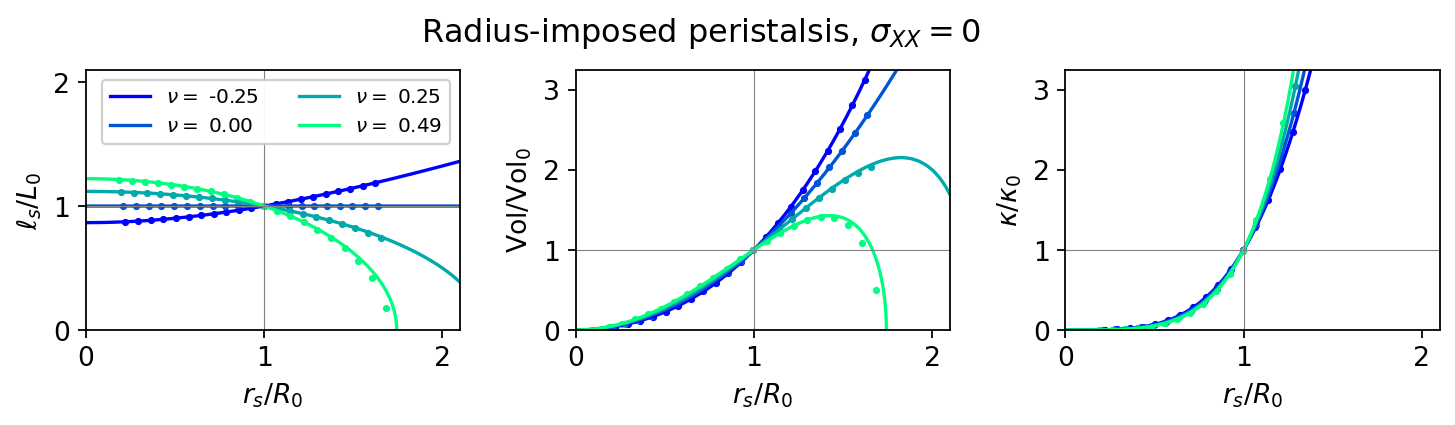

In [19]:
fig,axs = plt.subplots(1,3,dpi=160,sharex=True)

#Now, we actually select which values of nu to use for plotting. 
nuList = [-.25,0,.25,.49] #Desired nu values (Should be a subset of those from COMSOL!)
uniform_radial_plot_data = []
for nu in nuList:
    for i in range(num_nu):
        if uniform_radial_data[i,0,0] == nu:
            uniform_radial_plot_data.append(uniform_radial_data[i])
uniform_radial_plot_data = np.array(uniform_radial_plot_data)       

rsList = np.linspace(0.01,3,10000)

cmap = plt.get_cmap('winter')
size = 5

for i in range(len(nuList)):
    nu = nuList[i]
    color = cmap(i / (len(nuList) - 1))
    rs_data = 1+uniform_radial_plot_data[i,:,2]
    ls_data = 1+uniform_radial_plot_data[i,:,3]
    vol_data = uniform_radial_plot_data[i,:,4]
    kappa_data = uniform_radial_plot_data[i,:,5]
    axs[0].plot(rsList, lsHoop(rsList, nu), color=color, label=r'$\nu = $ %1.2f' %nu)
    axs[0].scatter(rs_data, ls_data, color=color, s=size)
    axs[1].plot(rsList, volHoop(rsList, nu), color=color, label=r'$\nu = $ %1.2f' %nu)
    axs[1].scatter(rs_data, vol_data, color=color, s=size)
    axs[2].plot(rsList, conductanceHoop(rsList, nu), color=color, label=r'$\nu = $ %1.2f' %nu)
    axs[2].scatter(rs_data, kappa_data, color=color, s=size)

xMin=0; xMax = 2.1
volMin=0; volMax = 3.25
kappaMin=0; kappaMax = 3.25
yMin = [xMin,volMin,kappaMin]
yMax = [xMax,volMax,kappaMax]
letters = [r'$(a)$',r'$(b)$',r'$(c)$']
ylabel = [r'$\ell_s/L_0$', r'$\mathrm{Vol}/\mathrm{Vol}_0$', r'$\kappa/\kappa_0$']

for k in range(3):
    axs[k].set_xlabel(r'$r_s/R_0$')
    axs[k].set_xlim(xMin,xMax)
    axs[k].set_ylim(yMin[k],yMax[k])
    #axs[k].text(-.175, 1.025, letters[k], fontsize=12, ha='center', va='center', transform=axs[k].transAxes)
    axs[k].set_ylabel(ylabel[k])
    axs[k].axvline(x=1, color='gray', linestyle='-',linewidth=.5)
    axs[k].axhline(y=1, color='gray', linestyle='-',linewidth=.5)

fig.suptitle(r'Radius-imposed peristalsis, $\sigma_{XX} = 0$',x=.75,y=.55)

axs[0].legend(ncols=2,fontsize=9,framealpha=0.95)

plt.tight_layout(rect=(0,0,1.5,.6),w_pad=.75, h_pad=.0)
plt.show()

fig.savefig('UniformContractionRadial.png', format='png', bbox_inches='tight', dpi=300)
fig.savefig('UniformContractionRadial.svg', format='svg', bbox_inches='tight', dpi=300)

In [15]:
#Columns (all quantities normalized): 0: nu, 1: t (won't be used), 2: urInner, 3: uzOutlet, 4: Volume, 5: conductance
uniform_longitudinal_data0 = (np.loadtxt("Uniform contraction longitudinal final data.txt"))

#unpack, separating by different nu values and trim data for plotting. 
num_nu = 5 #total number of nu parameters solved in COMSOL

len_data = len(uniform_longitudinal_data0)
numPoints = 20 #Number of points that will be displayed for each value of nu. 
uniform_longitudinal_data = [0]*num_nu
for i in range(num_nu):
    data_temp = uniform_longitudinal_data0[i*int(len_data/num_nu):(i+1)*int(len_data/num_nu)]
    data_temp_trimmed = data_temp[0::int((len_data/num_nu)/numPoints)]
    uniform_longitudinal_data[i] = data_temp_trimmed
uniform_longitudinal_data = np.array(uniform_longitudinal_data)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_73875/517179374.py:14: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-nu * ls**2 + (1+nu))


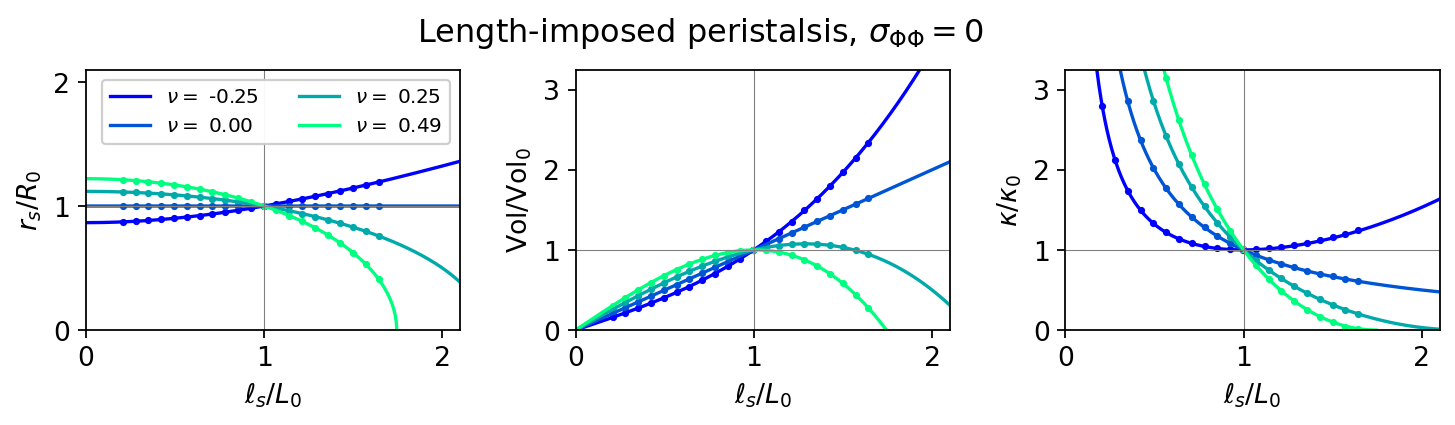

In [18]:
fig,axs = plt.subplots(1,3,dpi=160,sharex=True)

#Now, we actually select which values of nu to use for plotting. 
nuList = [-.25,0,.25,.49] #Desired nu values (Should be a subset of those from COMSOL!)
uniform_longitudinal_plot_data = []
for nu in nuList:
    for i in range(num_nu):
        if uniform_longitudinal_data[i,0,0] == nu:
            uniform_longitudinal_plot_data.append(uniform_longitudinal_data[i])
uniform_longitudinal_plot_data = np.array(uniform_longitudinal_plot_data)

lsList = np.linspace(0.01,3,10000)

cmap = plt.get_cmap('winter')
size = 5

for i in range(len(nuList)):
    nu = nuList[i]
    color = cmap(i / (len(nuList) - 1))
    rs_data = 1+uniform_longitudinal_plot_data[i,:,2]
    ls_data = 1+uniform_longitudinal_plot_data[i,:,3]
    vol_data = uniform_longitudinal_plot_data[i,:,4]
    kappa_data = uniform_longitudinal_plot_data[i,:,5]
    axs[0].plot(lsList, rsTension(lsList, nu), color=color, label=r'$\nu = $ %1.2f' %nu)
    axs[0].scatter(ls_data, rs_data, color=color, s=size)
    axs[1].plot(lsList, volTension(lsList, nu), color=color, label=r'$\nu = $ %1.2f' %nu)
    axs[1].scatter(ls_data, vol_data, color=color, s=size)
    axs[2].plot(lsList, conductanceTension(lsList, nu), color=color, label=r'$\nu = $ %1.2f' %nu)
    axs[2].scatter(ls_data, kappa_data, color=color, s=size)

xMin=0; xMax = 2.1
volMin=0; volMax = 3.25
kappaMin=0; kappaMax = 3.25
yMin = [xMin,volMin,kappaMin]
yMax = [xMax,volMax,kappaMax]
letters = [r'$(d)$',r'$(e)$',r'$(f)$']
ylabel = [r'$r_s/R_0$', r'$\mathrm{Vol}/\mathrm{Vol}_0$', r'$\kappa/\kappa_0$']

for k in range(3):
    axs[k].set_xlabel(r'$\ell_s/L_0$')
    axs[k].set_xlim(xMin,xMax)
    axs[k].set_ylim(yMin[k],yMax[k])
    #axs[k].text(-.175, 1.025, letters[k], fontsize=12, ha='center', va='center', transform=axs[k].transAxes)
    axs[k].set_ylabel(ylabel[k])
    axs[k].axvline(x=1, color='gray', linestyle='-',linewidth=.5)
    axs[k].axhline(y=1, color='gray', linestyle='-',linewidth=.5)

fig.suptitle(r'Length-imposed peristalsis, $\sigma_{\Phi \Phi} = 0$',x=.75,y=.55)

axs[0].legend(ncols=2,fontsize=9,framealpha=0.95)

plt.tight_layout(rect=(0,0,1.5,.6),w_pad=.75, h_pad=.0)
plt.show()

fig.savefig('UniformContractionLongitudinal.png', format='png', bbox_inches='tight', dpi=300)
fig.savefig('UniformContractionLongitudinal.svg', format='svg', bbox_inches='tight', dpi=300)